# Cluster Visualisations for FairCal based on Salvador et al., 2022
## Reproduced by Group 42 of FACT-AI 2022/23 @ UvA

### Imports

In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

### Loading a KMeans file

In [2]:
def load_KMeans(dataset, feature, n_clusters, fold_nr):
    filename = f'experiments/kmeans/{dataset}_{feature}_nclusters{str(n_clusters)}_fold{str(fold_nr)}'
    results = np.load(f'{filename}.npy', allow_pickle=True).item()
    
    return results

### Example dataset-feature-cluster-fold combination

In [3]:
dataset = 'rfw'
feature = 'facenet-webface'
n_clusters = 100
fold_nr = 1

img_array = load_KMeans(dataset, feature, n_clusters, fold_nr)

/Users/milenakapralova/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator KMeans from version 1.1.3 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
print(img_array)

KMeans(n_clusters=100, n_init=10)


### Loading the embeddings

In [5]:
def load_embeddings(dataset, feature):
    embedding_data = pickle.load(open(f'embeddings/{feature}_{dataset}_embeddings.pk', 'rb'))
    
    return embedding_data

In [6]:
embedding_data = load_embeddings(dataset, feature)

### Predicting clusters

In [7]:
embedding_data['i_cluster'] = img_array.predict(np.vstack(embedding_data['embedding'].to_numpy()).astype('double'))

In [8]:
embedding_data.head()

,category,person,image_id,img_path,embedding,i_cluster
0,Caucasian,m.0cl9kh,m.0cl9kh_0001,data/rfw/data/Caucasian/m.0cl9kh/m.0cl9kh_0001...,"[-0.07362084, -0.032686774, -0.023440572, -0.0...",90
1,Caucasian,m.0cl9kh,m.0cl9kh_0003,data/rfw/data/Caucasian/m.0cl9kh/m.0cl9kh_0003...,"[-0.04244986, -0.001834187, -0.0017889304, -0....",90
2,Caucasian,m.0cl9kh,m.0cl9kh_0004,data/rfw/data/Caucasian/m.0cl9kh/m.0cl9kh_0004...,"[-0.04558669, 0.016659236, -0.011350209, -0.00...",67
3,Caucasian,m.0cl9kh,m.0cl9kh_0002,data/rfw/data/Caucasian/m.0cl9kh/m.0cl9kh_0002...,"[-0.076317206, 0.010774781, -0.03565117, -0.00...",90
4,Caucasian,m.0cl9kh,m.0cl9kh_0005,data/rfw/data/Caucasian/m.0cl9kh/m.0cl9kh_0005...,"[-0.018754296, 0.0010367417, -0.0026780085, 0....",90


### Storing information on what image paths belong to a each cluster

In [9]:
cluster_scores = {}

for cluster_id in range(n_clusters):
    cond = embedding_data['i_cluster'] == cluster_id
    cluster_scores[str(cluster_id + 1)] = embedding_data['img_path'][cond].tolist()

### Visualising a sample cluster

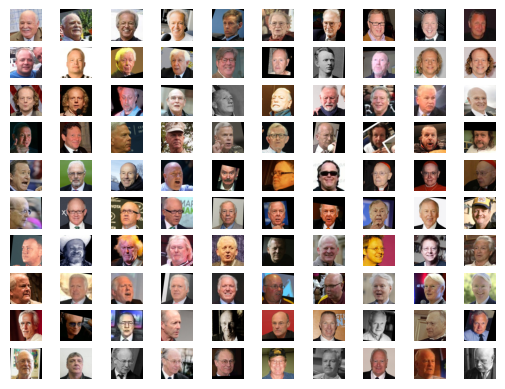

In [17]:
x_size = 10
y_size = 10
clusters_to_visualise = [x for x in range(31, 51)]

f, axarr = plt.subplots(x_size, y_size)
# f.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.2,
#                     hspace=0.2)
# f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

for cluster_to_visualise in clusters_to_visualise:
    number_plotted_already = 0
    for x_axis in range(x_size):
        for y_axis in range(y_size):
            img_path = cluster_scores[str(cluster_to_visualise)][number_plotted_already]
            image = mpimg.imread(img_path)
            axarr[x_axis, y_axis].margins(x=0)
            axarr[x_axis, y_axis].imshow(image)
            axarr[x_axis, y_axis].margins(x=0)
    #         f.tight_layout()        
            axarr[x_axis, y_axis].axis('off')
            number_plotted_already += 1
    #         axarr[x_axis, y_axis].grid(color='r', linestyle='-', linewidth=5)
    # f.tight_layout(pad=0.5)

    # f.suptitle(f"Cluster {cluster_to_visualise} \n{dataset}, fold {fold_nr}, fitted on {feature}")
#     f.tight_layout()
#     f.show()

    f.savefig(f"Cluster{cluster_to_visualise}.pdf", bbox_inches = 'tight', pad_inches = 0.2)